In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd

from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score

SOME IMPORTANT FUNCTIONS

In [2]:
def plot_roc_curve(fpr, tpr,auc):
    plt.plot(fpr, tpr, color='orange', label='ROC -AUC %.2f' %auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid()
    plt.legend()
    plt.show()
def analize_data(X_text,y_test,predictions,probs):
    print(pd.DataFrame(confusion_matrix(y_test, predictions), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']))
    print("\n")
    print(classification_report(y_test,predictions))
    probs=probs[:,1]
    auc = roc_auc_score(y_test, probs)
   
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fpr, tpr,auc)
    return auc

def plot_hist(classification,hist_value,data,bins,size,numeric=False):
    plt.figure(figsize=size)
    if numeric:
        plt.xticks(np.arange(0, max(data[hist_value]), max(data[hist_value]/20)))
    data[data[classification]==0][hist_value].hist(alpha=0.9,color='red',bins=bins)
    data[data[classification]==1][hist_value].hist(alpha=0.3,color='blue',bins=bins)

In [3]:
file = 'C:\\Users\\Forex1\\Desktop\\AI\\ml-german-credit\\data\\german.data'


names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv(file,names = names, delimiter=' ')
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
data['classification'].replace([1,2], [1,0], inplace=True)
data['classification'].value_counts()


1    700
0    300
Name: classification, dtype: int64

For simplify binary classification

0 - BAD CLIENT
1 -GOOD CLIENT

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable']



In [7]:
data[numvars].describe()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,2.973000,2.845000,35.546000,1.407000,1.155000
std,2822.736876,12.058814,1.118715,1.103718,11.375469,0.577654,0.362086
min,250.000000,4.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,1365.500000,12.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,2319.500000,18.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,3972.250000,24.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,18424.000000,72.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars]),columns=numvars)

In [9]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))
lecatdata =pd.DataFrame(StandardScaler().fit_transform(lecatdata),columns=catvars)

In [10]:
data_prep = pd.concat([numdata_std, lecatdata,data['classification']], axis = 1)

In [11]:
data_prep

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking,credithistory,purpose,...,employmentsince,statussex,otherdebtors,property,otherinstallmentplans,housing,job,telephone,foreignworker,classification
0,-0.745131,-1.236478,0.918477,1.046987,2.766456,1.027079,-0.428290,-1.254566,1.344014,0.264068,...,1.338078,0.449326,-0.303686,-1.293723,0.460831,0.133710,0.146949,1.214598,-0.196014,1
1,0.949817,2.248194,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.459026,-0.503428,0.264068,...,-0.317959,-0.963650,-0.303686,-1.293723,0.460831,0.133710,0.146949,-0.823318,-0.196014,0
2,-0.416562,-0.738668,-0.870183,0.140505,1.183312,-0.704926,2.334869,1.132053,1.344014,1.359785,...,0.510060,0.449326,-0.303686,-1.293723,0.460831,0.133710,-1.383771,-0.823318,-0.196014,1
3,1.634247,1.750384,-0.870183,1.046987,0.831502,-0.704926,2.334869,-1.254566,-0.503428,-0.101171,...,0.510060,0.449326,3.885083,-0.341055,0.460831,2.016956,0.146949,-0.823318,-0.196014,1
4,0.566664,0.256953,0.024147,1.046987,1.535122,1.027079,2.334869,-1.254566,0.420293,-1.196889,...,-0.317959,0.449326,-0.303686,1.564281,0.460831,2.016956,0.146949,-0.823318,-0.196014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.544162,-0.738668,0.024147,1.046987,-0.399832,-0.704926,-0.428290,1.132053,-0.503428,-0.101171,...,0.510060,-0.963650,-0.303686,-1.293723,0.460831,0.133710,-1.383771,-0.823318,-0.196014,1
996,0.207612,0.754763,0.918477,1.046987,0.391740,-0.704926,-0.428290,-1.254566,-0.503428,-0.831650,...,-0.317959,-2.376626,-0.303686,-0.341055,0.460831,0.133710,1.677670,1.214598,-0.196014,1
997,-0.874503,-0.738668,0.918477,1.046987,0.215835,-0.704926,-0.428290,1.132053,-0.503428,0.264068,...,1.338078,0.449326,-0.303686,0.611613,0.460831,0.133710,0.146949,-0.823318,-0.196014,1
998,-0.505528,1.999289,0.918477,1.046987,-1.103451,-0.704926,-0.428290,-1.254566,-0.503428,0.264068,...,-0.317959,0.449326,-0.303686,1.564281,0.460831,2.016956,0.146949,1.214598,-0.196014,0


In [12]:
from sklearn.model_selection import train_test_split  

X = data_prep.drop('classification', axis=1)
y = data_prep['classification']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

#X_u = data_prep_undersampl.drop('classification', axis=1)
#y_u = data_prep_undersampl['classification']
#X_u_train, X_u_test, y_u_train, y_u_test = train_test_split(X_u,y_u,test_size=0.2,random_state=111)

In [13]:
Xy_train=pd.concat([X_train,y_train],axis=1)
Xy_train['classification'].value_counts()

1    561
0    239
Name: classification, dtype: int64

In [14]:
Xy_train_undersampl=pd.concat([Xy_train[Xy_train['classification']==0],Xy_train[Xy_train['classification']==1].sample(n=320)]).sample(frac=1)
X_u_train=Xy_train_undersampl.drop('classification',axis=1)
y_u_train=Xy_train_undersampl['classification']

In [15]:
y_test.value_counts()

1    139
0     61
Name: classification, dtype: int64

In [17]:
Comp_DF=pd.DataFrame(np.zeros((2,7)), 
             columns=['MLP','MLP_U','BAYES','BAYES_U','FOREST','FOREST_U','HYBRID'], 
             index=['AUC', 'Indicator'])

In [18]:
Comp_DF

,MLP,MLP_U,BAYES,BAYES_U,FOREST,FOREST_U,HYBRID
AUC,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Indicator,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(100,40,100), max_iter=1000,verbose=True)  
mlp.fit(X_train, y_train.values.reshape(-1))  

Iteration 1, loss = 0.67551360
Iteration 2, loss = 0.61889977
Iteration 3, loss = 0.58991492
Iteration 4, loss = 0.57221256
Iteration 5, loss = 0.55596867
Iteration 6, loss = 0.53609512
Iteration 7, loss = 0.51720830
Iteration 8, loss = 0.50380279
Iteration 9, loss = 0.49115054
Iteration 10, loss = 0.47844669
Iteration 11, loss = 0.46758861
Iteration 12, loss = 0.45689846
Iteration 13, loss = 0.44745796
Iteration 14, loss = 0.43902391
Iteration 15, loss = 0.43000309
Iteration 16, loss = 0.42129225
Iteration 17, loss = 0.41349884
Iteration 18, loss = 0.40449216
Iteration 19, loss = 0.39597781
Iteration 20, loss = 0.38642781
Iteration 21, loss = 0.37720975
Iteration 22, loss = 0.36745151
Iteration 23, loss = 0.35691031
Iteration 24, loss = 0.34628946
Iteration 25, loss = 0.33607932
Iteration 26, loss = 0.32515867
Iteration 27, loss = 0.31450453
Iteration 28, loss = 0.30261951
Iteration 29, loss = 0.29118571
Iteration 30, loss = 0.27935500
Iteration 31, loss = 0.26872441
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 40, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

                 Predicted Negative  Predicted Positive
Actual Negative                  37                  24
Actual Positive                  24                 115


              precision    recall  f1-score   support

           0       0.61      0.61      0.61        61
           1       0.83      0.83      0.83       139

    accuracy                           0.76       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.76      0.76      0.76       200



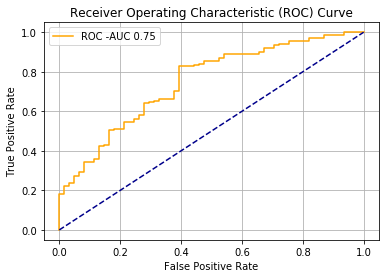

In [20]:
predictions = mlp.predict(X_test)
probs = mlp.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [22]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['MLP']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['MLP']['AUC']=auc

In [23]:
mlp_u = MLPClassifier(hidden_layer_sizes=(100,40,100), max_iter=1000,verbose=True)  
mlp_u.fit(X_u_train, y_u_train.values.reshape(-1))  

Iteration 1, loss = 0.70634604
Iteration 2, loss = 0.67788790
Iteration 3, loss = 0.65694549
Iteration 4, loss = 0.64142288
Iteration 5, loss = 0.62453513
Iteration 6, loss = 0.60853018
Iteration 7, loss = 0.58845722
Iteration 8, loss = 0.57190438
Iteration 9, loss = 0.55335202
Iteration 10, loss = 0.53816216
Iteration 11, loss = 0.52278703
Iteration 12, loss = 0.51011360
Iteration 13, loss = 0.49945605
Iteration 14, loss = 0.48901265
Iteration 15, loss = 0.48081362
Iteration 16, loss = 0.47058467
Iteration 17, loss = 0.46149978
Iteration 18, loss = 0.45258275
Iteration 19, loss = 0.44347482
Iteration 20, loss = 0.43546635
Iteration 21, loss = 0.42567540
Iteration 22, loss = 0.41667817
Iteration 23, loss = 0.40795865
Iteration 24, loss = 0.39778277
Iteration 25, loss = 0.38768922
Iteration 26, loss = 0.37760950
Iteration 27, loss = 0.36692362
Iteration 28, loss = 0.35631602
Iteration 29, loss = 0.34435209
Iteration 30, loss = 0.33356843
Iteration 31, loss = 0.32223934
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 40, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

                 Predicted Negative  Predicted Positive
Actual Negative                  40                  21
Actual Positive                  35                 104


              precision    recall  f1-score   support

           0       0.53      0.66      0.59        61
           1       0.83      0.75      0.79       139

    accuracy                           0.72       200
   macro avg       0.68      0.70      0.69       200
weighted avg       0.74      0.72      0.73       200



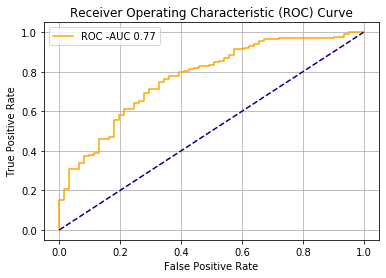

In [24]:
predictions = mlp_u.predict(X_test)
probs = mlp_u.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [25]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['MLP_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['MLP_U']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  38                  23
Actual Positive                  30                 109


              precision    recall  f1-score   support

           0       0.56      0.62      0.59        61
           1       0.83      0.78      0.80       139

    accuracy                           0.73       200
   macro avg       0.69      0.70      0.70       200
weighted avg       0.74      0.73      0.74       200



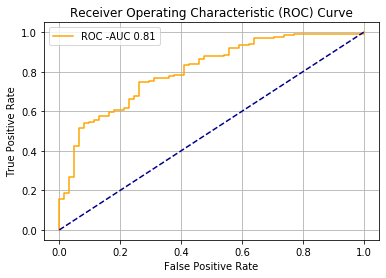

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
probs = gnb.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [27]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['BAYES']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['BAYES']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  45                  16
Actual Positive                  35                 104


              precision    recall  f1-score   support

           0       0.56      0.74      0.64        61
           1       0.87      0.75      0.80       139

    accuracy                           0.74       200
   macro avg       0.71      0.74      0.72       200
weighted avg       0.77      0.74      0.75       200



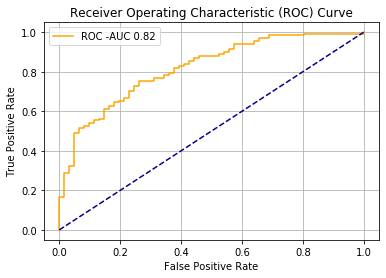

In [28]:
gnb_u = GaussianNB()
gnb_u.fit(X_u_train, y_u_train)
predictions = gnb_u.predict(X_test)
probs = gnb_u.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [29]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['BAYES_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['BAYES_U']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  29                  32
Actual Positive                   6                 133


              precision    recall  f1-score   support

           0       0.83      0.48      0.60        61
           1       0.81      0.96      0.88       139

    accuracy                           0.81       200
   macro avg       0.82      0.72      0.74       200
weighted avg       0.81      0.81      0.79       200



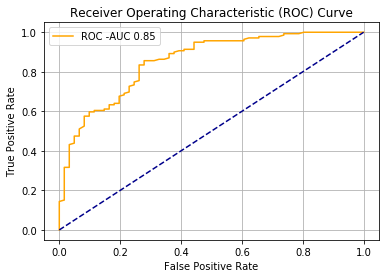

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
probs = rfc.predict_proba(X_test)
auc=analize_data(X_test,y_test,predictions,probs)

In [31]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['FOREST']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['FOREST']['AUC']=auc

                 Predicted Negative  Predicted Positive
Actual Negative                  43                  18
Actual Positive                  25                 114


              precision    recall  f1-score   support

           0       0.63      0.70      0.67        61
           1       0.86      0.82      0.84       139

    accuracy                           0.79       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.79      0.79      0.79       200



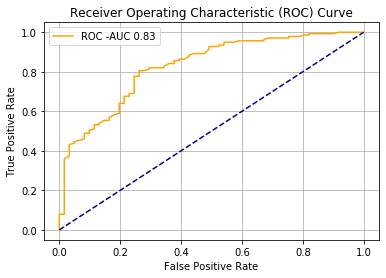

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc_u=RandomForestClassifier(n_estimators=500)
rfc_u.fit(X_u_train,y_u_train)
predictions = rfc_u.predict(X_test)
probs = rfc_u.predict_proba(X_test)
auc = analize_data(X_test,y_test,predictions,probs)

In [33]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['FOREST_U']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['FOREST_U']['AUC']=auc

System Proposotion

In [34]:
def Predictions(sample_X):

    pred_gnb = gnb.predict(sample_X)
    pred_rfc = rfc.predict(sample_X)
    pred_mlp = mlp.predict(sample_X)
    
    voting=round((pred_gnb[0]+pred_rfc[0]+pred_mlp[0])/3)
    if voting:
        pred_u_gnb = gnb_u.predict(sample_X)
        pred_u_rfc  = rfc_u.predict(sample_X)
        pred_u_mlp  = mlp_u.predict(sample_X)
        
        prob_u_gnb = gnb_u.predict_proba(sample_X)[0]
        prob_u_rfc = rfc_u.predict_proba(sample_X)[0]
        prob_u_mlp = mlp_u.predict_proba(sample_X)[0]
        
        voting=round((pred_u_gnb[0]+pred_u_rfc[0]+pred_u_mlp[0])/3)
        prob=max(prob_u_gnb,prob_u_rfc,prob_u_mlp,key=lambda x: x[1]) if voting \
             else min(prob_u_gnb,prob_u_rfc,prob_u_mlp,key=lambda x: x[1])
        
    else:
        prob_gnb = gnb.predict_proba(sample_X)[0]
        prob_rfc = rfc.predict_proba(sample_X)[0]
        prob_mlp = mlp.predict_proba(sample_X)[0]
        prob=min(prob_gnb,prob_rfc,prob_mlp, key=lambda x: x[1])
    return voting,prob

In [35]:
predictions=[]
probs=[]
for index, sample_X in X_test.iterrows():
    sample_X=sample_X.values.reshape(1,-1)
    voting,prob=Predictions(sample_X)
    predictions.append(voting)
    probs.append([prob[0],prob[1]])
    

                 Predicted Negative  Predicted Positive
Actual Negative                  46                  15
Actual Positive                  29                 110


              precision    recall  f1-score   support

           0       0.61      0.75      0.68        61
           1       0.88      0.79      0.83       139

    accuracy                           0.78       200
   macro avg       0.75      0.77      0.75       200
weighted avg       0.80      0.78      0.79       200



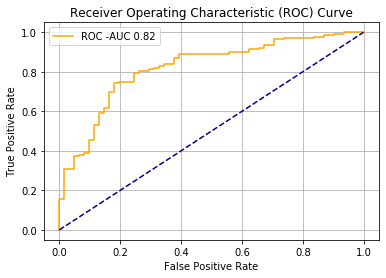

In [36]:
auc = analize_data(X_test,y_test,predictions,np.array(probs))


In [64]:
a,b=confusion_matrix(y_test, predictions)
Comp_DF['HYBRID']['Indicator']=0*a[0]+0*b[1]-(a[1]*5+b[0])/len(y_test)
Comp_DF['HYBRID']['AUC']=auc
Comp_DF_T=Comp_DF.transpose()

In [80]:
Comp_DF_T.index.values

array(['MLP', 'MLP_U', 'BAYES', 'BAYES_U', 'FOREST', 'FOREST_U', 'HYBRID'],
      dtype=object)

"\nplt.plot(credit_df[0],credit_df[2],color='red',linestyle='dotted',label='Bad')\nplt.plot(credit_df[0],credit_df[3],color='blue',label='Good - Bad')\nplt.axhline(y=0,color='red',linestyle='--')\nplt.xticks(np.arange(0, 20000, 1000))\nplt.title('EV vs Credit Value')\nplt.legend()\nplt.grid()\n"

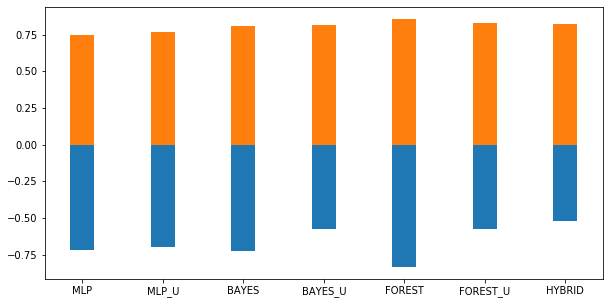

In [85]:
plt.figure(figsize=(10,5))
plt.bar(Comp_DF_T.index.values,Comp_DF_T['Indicator'],width=0.3)
plt.bar(Comp_DF_T.index.values,Comp_DF_T['AUC'],width=0.3)

plt.title('ROC ')
plt.legend()
plt.grid()


Features research

In [38]:
Features=list(zip(X.columns,rfc.feature_importances_))
Features.sort(key=lambda b: b[1],reverse=True)
Features

[('creditamount', 0.12772227151180807),
 ('age', 0.10643575381912723),
 ('existingchecking', 0.10624684409984292),
 ('duration', 0.10077159806517615),
 ('credithistory', 0.0648195640418169),
 ('purpose', 0.0636301214882538),
 ('employmentsince', 0.05260635827997673),
 ('savings', 0.04528903605852487),
 ('property', 0.04354249099647055),
 ('residencesince', 0.043408732732845956),
 ('installmentrate', 0.042574993689888284),
 ('statussex', 0.038094660659700554),
 ('job', 0.031980152455479444),
 ('otherinstallmentplans', 0.026587940905060174),
 ('housing', 0.02601321012757579),
 ('existingcredits', 0.02229323851656473),
 ('telephone', 0.0199433218442813),
 ('otherdebtors', 0.01994135298682655),
 ('peopleliable', 0.013216640012111779),
 ('foreignworker', 0.004881717708668159)]

In [39]:
mostImportantFeatures=[x for x in Features if x[1]>np.mean(rfc.feature_importances_)]
mostImportantFeatures

[('creditamount', 0.12772227151180807),
 ('age', 0.10643575381912723),
 ('existingchecking', 0.10624684409984292),
 ('duration', 0.10077159806517615),
 ('credithistory', 0.0648195640418169),
 ('purpose', 0.0636301214882538),
 ('employmentsince', 0.05260635827997673)]

Histograms

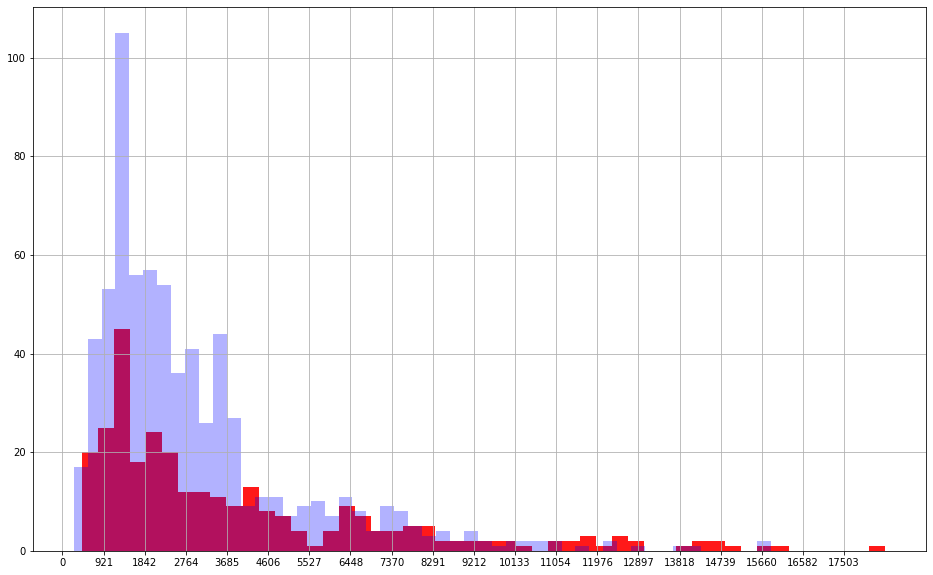

In [40]:
plot_hist('classification','creditamount',data,50,(16,10),True)

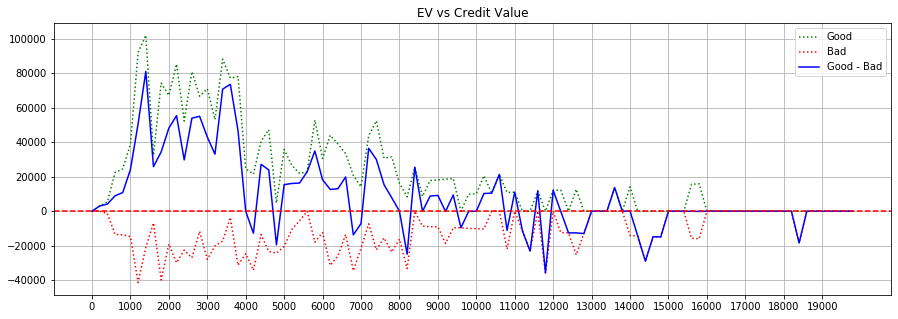

In [41]:
credit_dict={0: [],1 :[],2: [],3: []}
step=200
for cr in range(0,20000,step):
    credit_dict[0].append(cr)
    credit_dict[1].append(
    data[(data['classification']==1) &  (data['creditamount']>=cr) \
         & (data['creditamount']<cr+step)]['creditamount'].sum())
    credit_dict[2].append(-
    data[(data['classification']==0) &  (data['creditamount']>=cr) \
         & (data['creditamount']<cr+step)]['creditamount'].sum())
    credit_dict[3].append(credit_dict[1][-1]+credit_dict[2][-1])
credit_df=pd.DataFrame.from_dict(credit_dict)
#data
#pd.DataFrame.from_dict(credit_dict)
plt.figure(figsize=(15,5))
plt.plot(credit_df[0],credit_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(credit_df[0],credit_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(credit_df[0],credit_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(0, 20000, 1000))
plt.title('EV vs Credit Value')
plt.legend()
plt.grid()


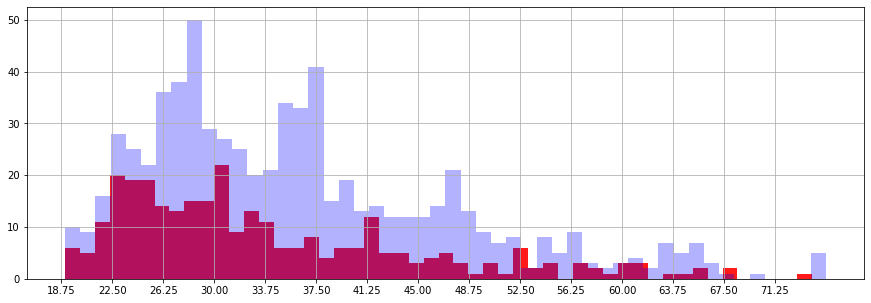

In [42]:
plot_hist('classification','age',data,50,(15,5),True)

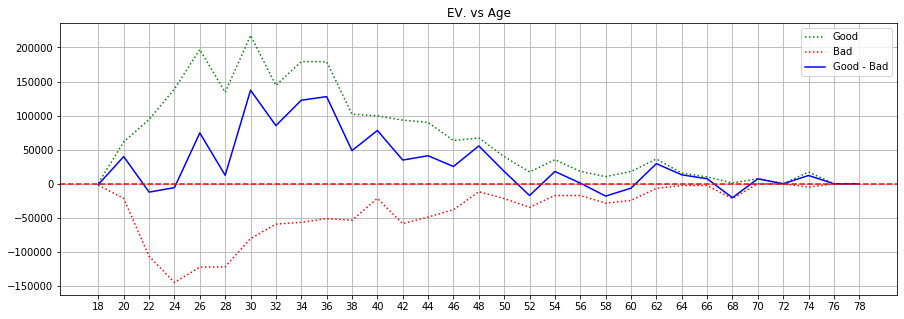

In [43]:
age_dict={0: [],1 :[], 2:[], 3:[]}
step=2
for ag in range(18,80,step):
    age_dict[0].append(ag)
    
    age_dict[1].append(data[\
                           (data['classification']==1)\
                       &   (data['age']>=ag) \
                       &   (data['age']<ag+step)\
                           ]['creditamount'].sum())
    age_dict[2].append(-data[\
                           (data['classification']==0)\
                       &   (data['age']>=ag) \
                       &   (data['age']<ag+step)\
                           ]['creditamount'].sum())
    
    age_dict[3].append(age_dict[1][-1]+age_dict[2][-1])
    
age_df=pd.DataFrame.from_dict(age_dict)

plt.figure(figsize=(15,5))
plt.plot(age_df[0],age_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(age_df[0],age_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(age_df[0],age_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(18, 80, 2))
plt.title('EV. vs Age')
plt.legend()
plt.grid()

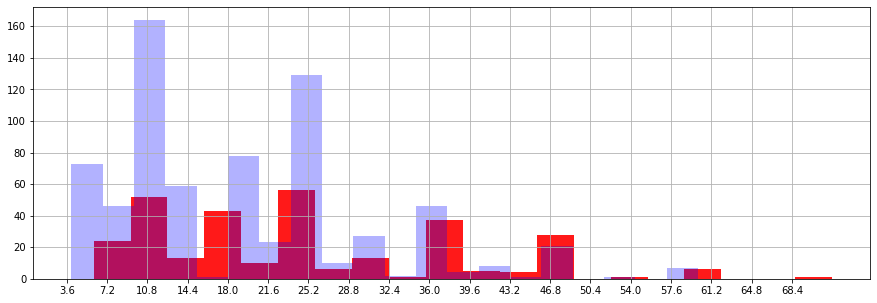

In [44]:
plot_hist('classification','duration',data,20,(15,5),True)

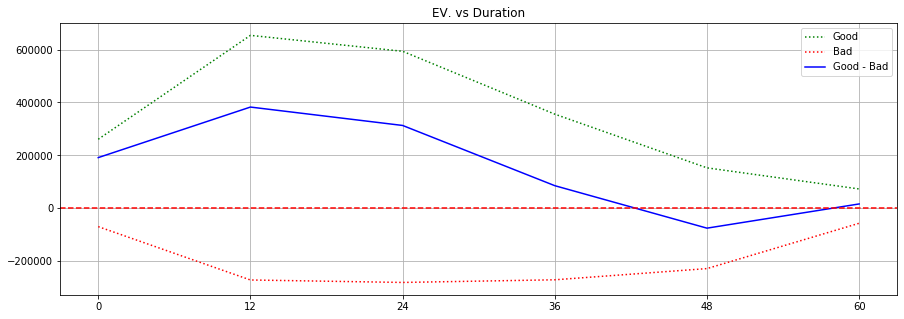

In [45]:
dur_dict={0: [],1 :[], 2:[], 3:[]}
step=12
for du in range(0,72,step):
    dur_dict[0].append(du)
    
    dur_dict[1].append(data[\
                           (data['classification']==1)\
                       &   (data['duration']>=du) \
                       &   (data['duration']<du+step)\
                           ]['creditamount'].sum())
    dur_dict[2].append(-data[\
                           (data['classification']==0)\
                       &   (data['duration']>=du) \
                       &   (data['duration']<du+step)\
                           ]['creditamount'].sum())
    
    dur_dict[3].append(dur_dict[1][-1]+dur_dict[2][-1])
    
dur_df=pd.DataFrame.from_dict(dur_dict)

plt.figure(figsize=(15,5))
plt.plot(dur_df[0],dur_df[1],color='green',linestyle='dotted',label='Good')
plt.plot(dur_df[0],dur_df[2],color='red',linestyle='dotted',label='Bad')
plt.plot(dur_df[0],dur_df[3],color='blue',label='Good - Bad')
plt.axhline(y=0,color='red',linestyle='--')
plt.xticks(np.arange(0, 72, step))
plt.title('EV. vs Duration')
plt.legend()
plt.grid()

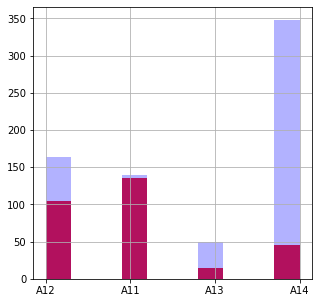

In [46]:
plot_hist('classification','existingchecking',data,10,(5,5))

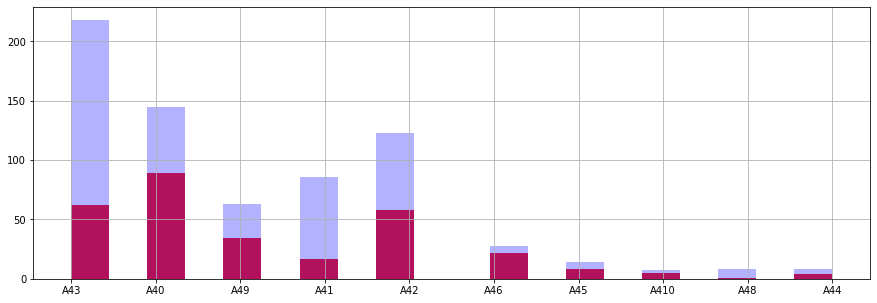

In [47]:
plot_hist('classification','purpose',data,20,(15,5))

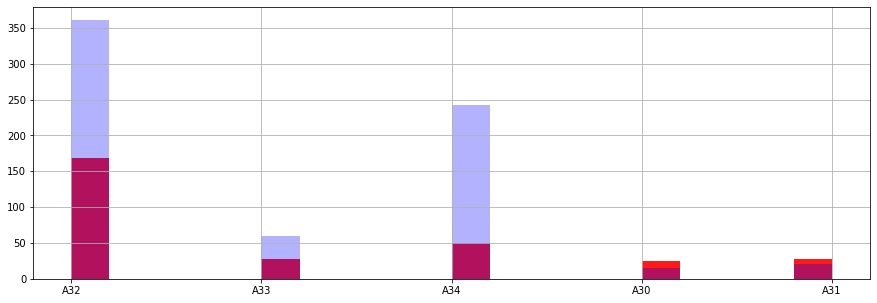

In [48]:
plot_hist('classification','credithistory',data,20,(15,5))

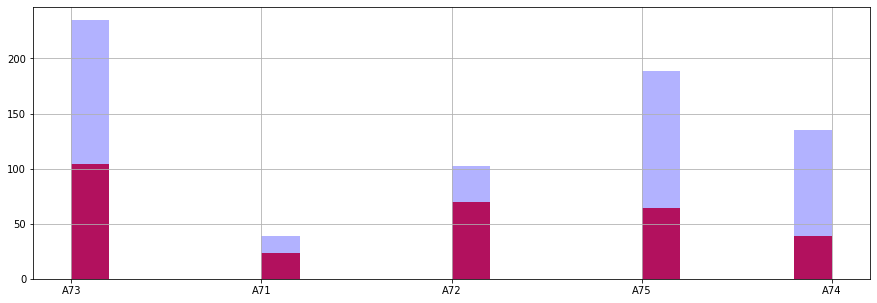

In [49]:
plot_hist('classification','employmentsince',data,20,(15,5))

ADDITIONAL RESEARCH

In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

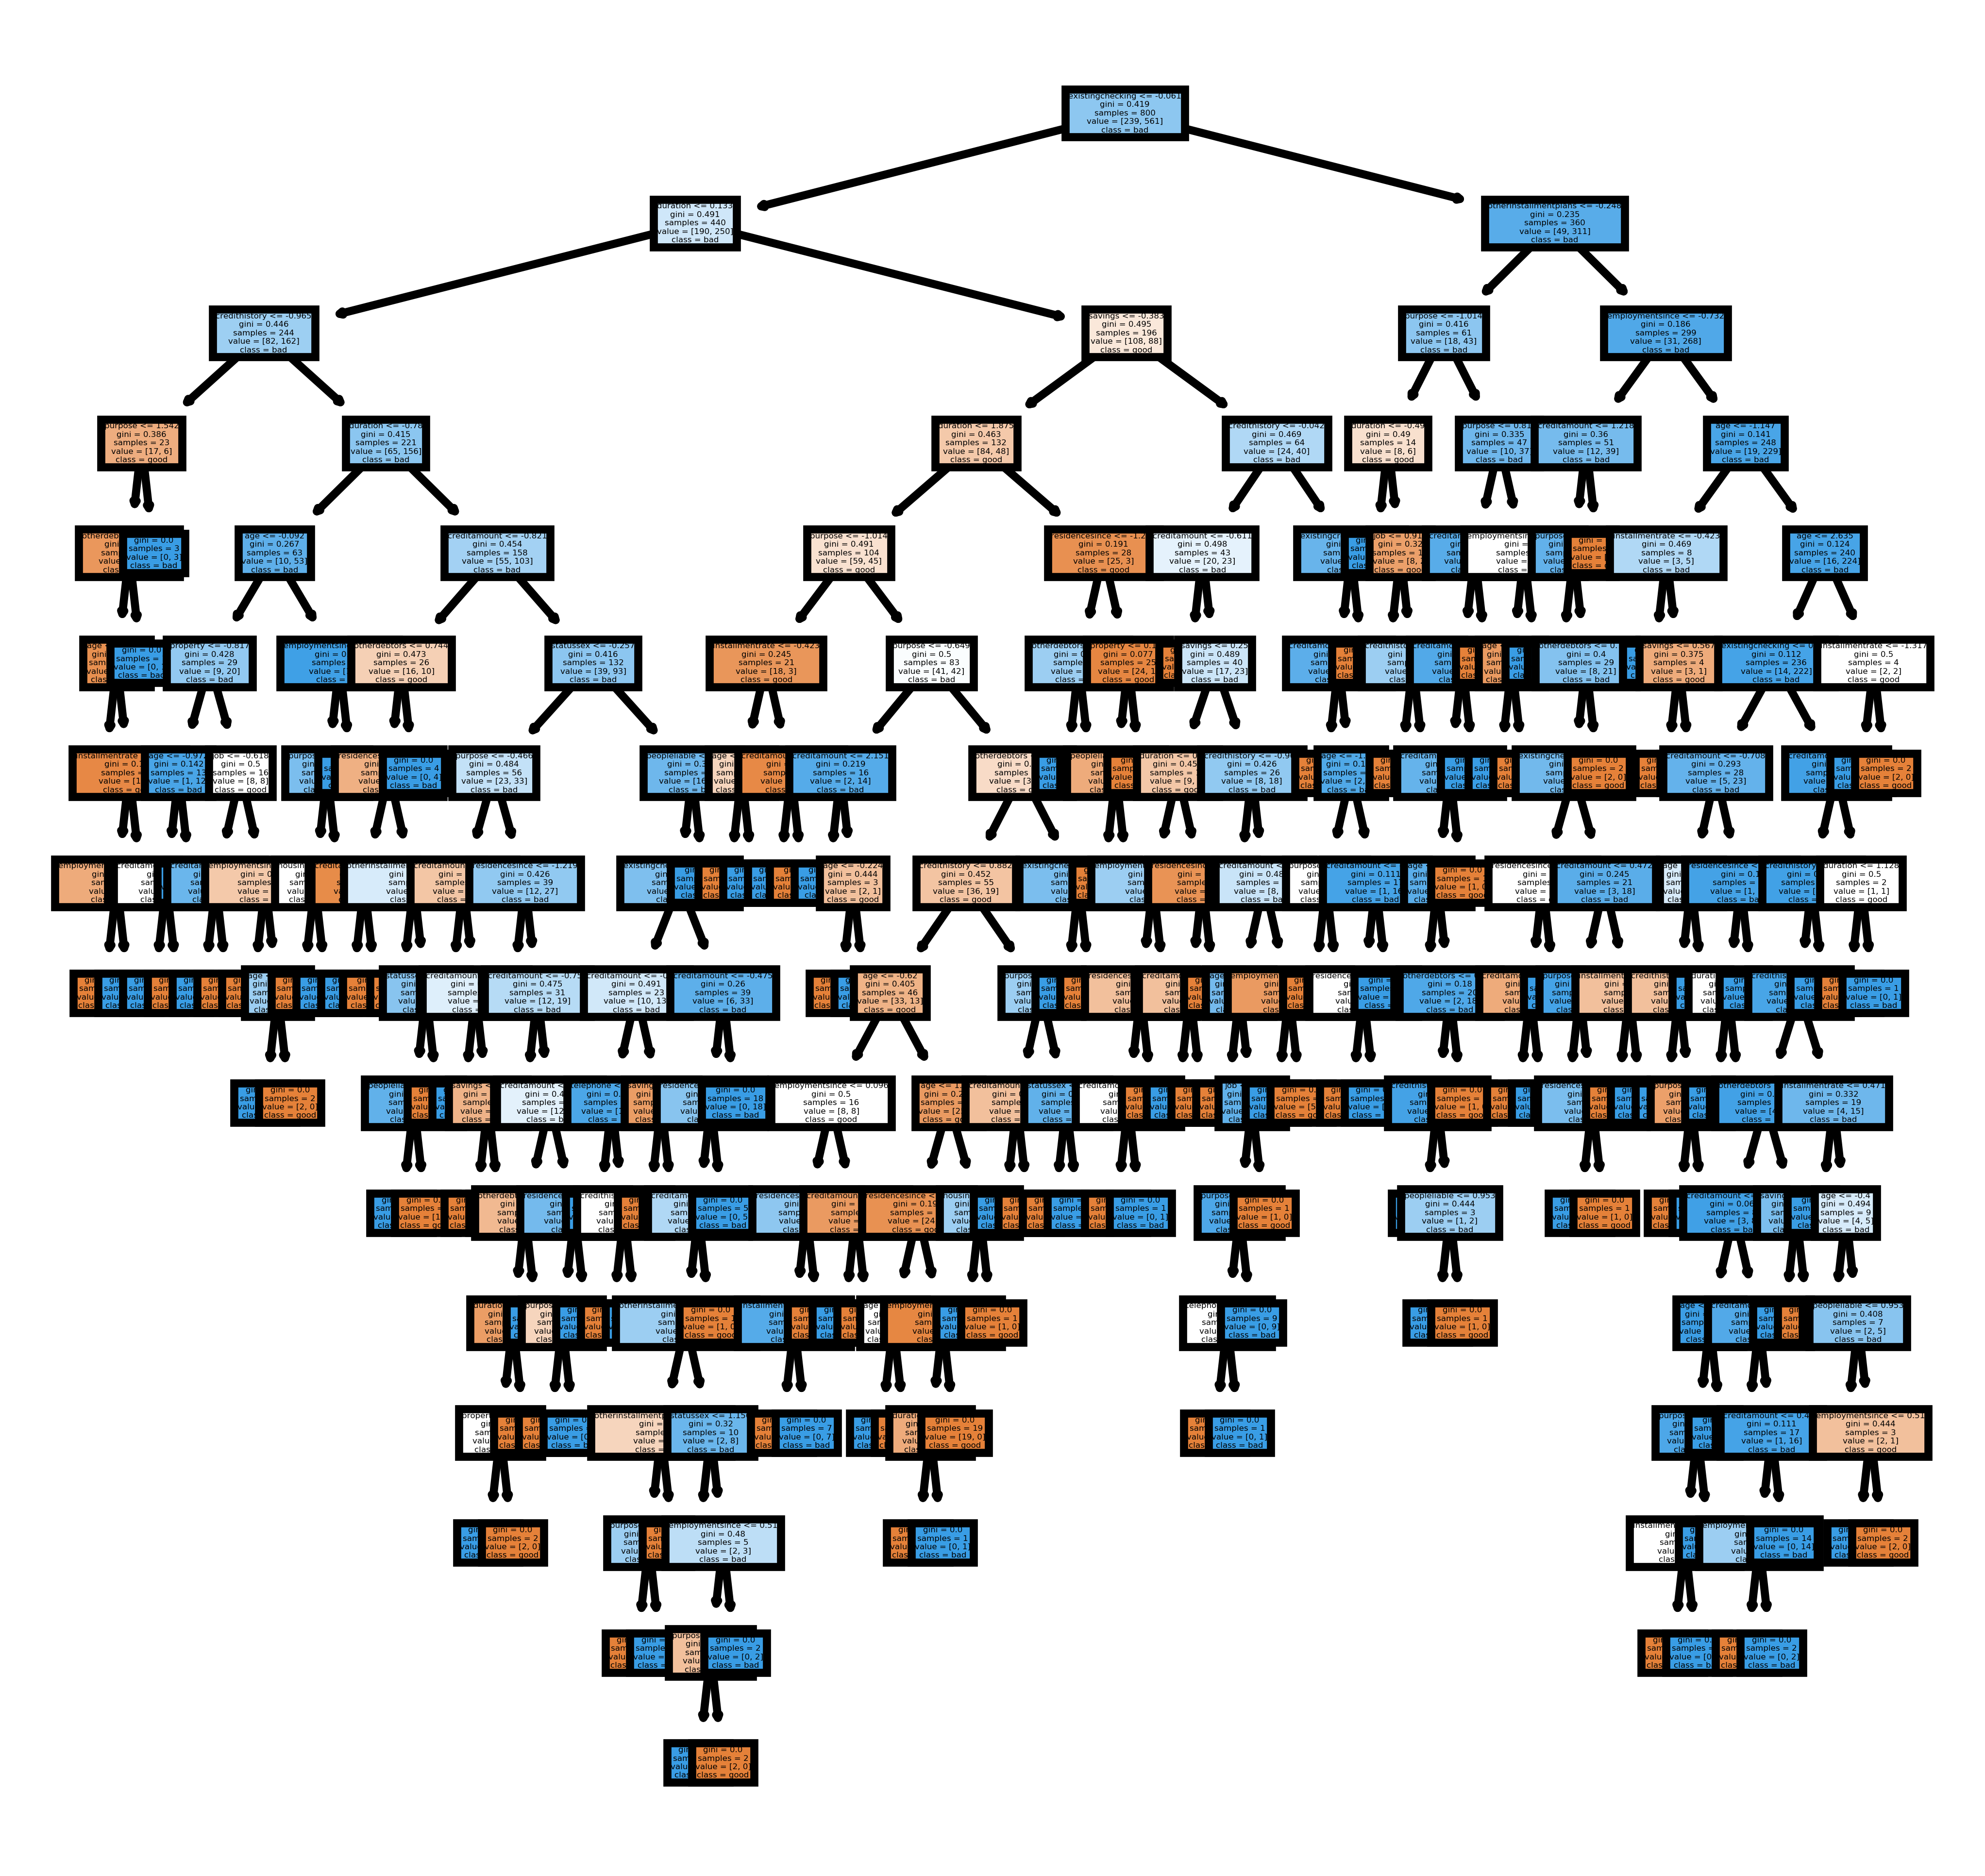

In [51]:
cn=['good','bad']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1200)
tree.plot_tree(dtree, 
               class_names=cn,
               feature_names =numvars+catvars,
               filled = True)
fig.savefig('imagename.png')

In [53]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,svd_solver='full')
pca.fit(X)
x_pca=pca.transform(X)
x_pca.shape,X.shape

((1000, 2), (1000, 20))

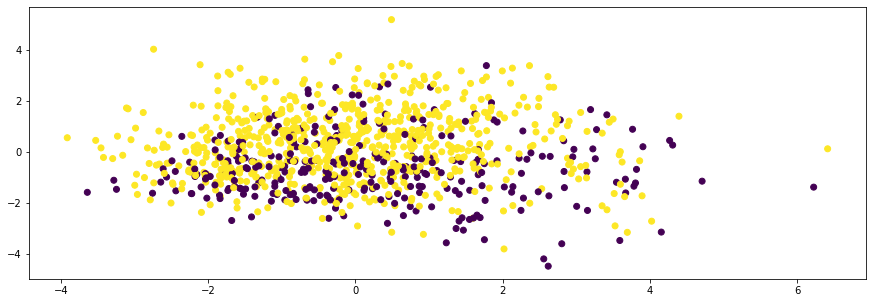

In [54]:
plt.figure(figsize=(15,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)


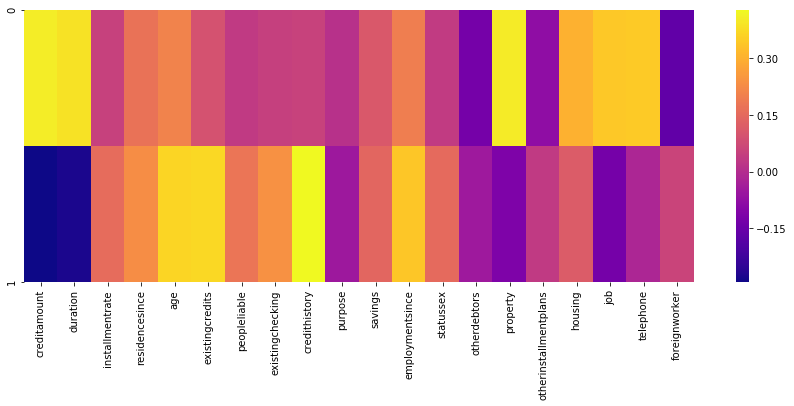

In [55]:
import seaborn as sb
components=pd.DataFrame(pca.components_,columns=numvars+catvars)
components
plt.figure(figsize=(15,5))
sb.heatmap(components,cmap='plasma')

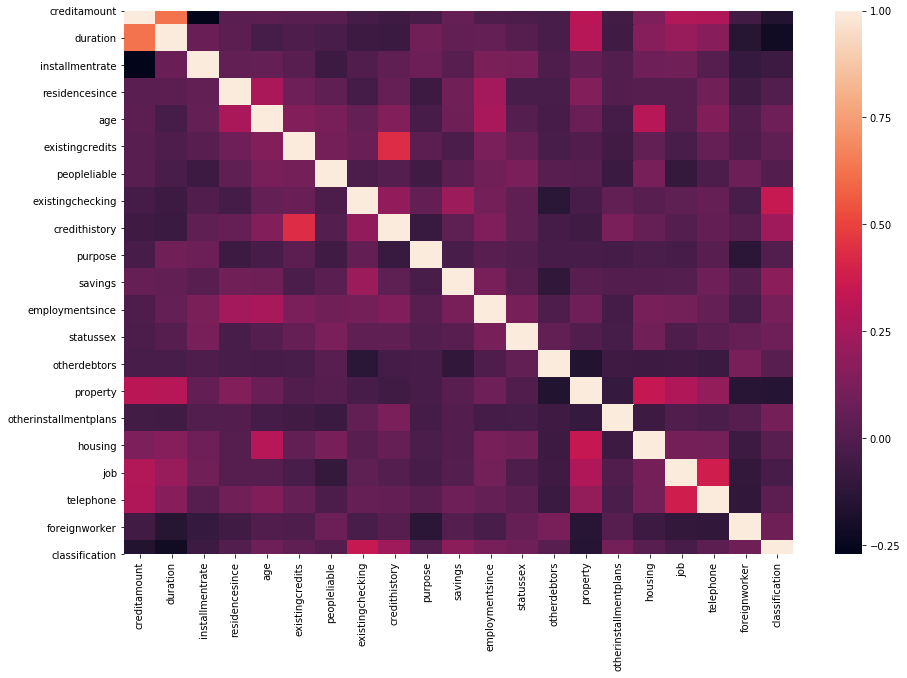

In [56]:
plt.figure(figsize=(15,10))
sb.heatmap(data_prep.corr());

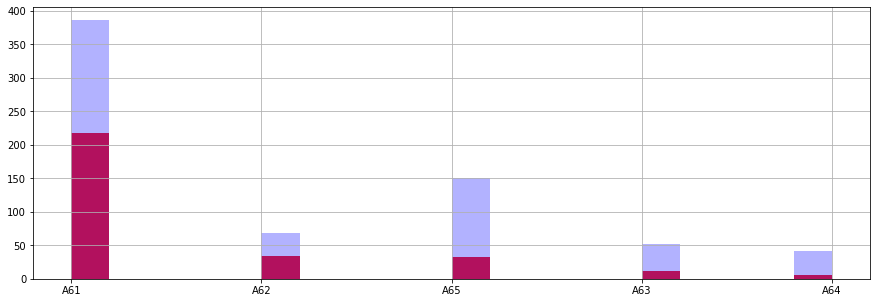

In [57]:
plot_hist('classification','savings',data,20,(15,5))